# Tutorial - `#02` Neural Networks and Optimization. 🧪🧠
---

**📑 TimeLine:**
1. [What is a Neural Network]().🧠
2. [Linear Classifiers]().➗
3. [Feed Forward Neural Networks]().➡️
4. [Deep Neural Networks]().🌊🔍
5. [What is really Optimization]().⚙️
5. [Sum Up and Overall of all the Neural Networks]().📈
6. [Training a Neural Network]().🚀
7. [Evaluation - Testing]().🧪✅
8. [How to actually understand the evaluation?]().🔎
9. [Overall Sum Up and further explanation.]().📝

      

---


## [1. What is a Neural Network.]()

<img src="https://res.cloudinary.com/dry8rzbyx/image/fetch/s--mjT0xmjH--/f_auto/q_auto/c_scale,w_1536/https://www.knime.com/sites/default/files/public/3-intro-deep-neural-networks.png" alt="Example Image" width="600">


A neural network is like a simplified model of how the human brain works. It’s a set of algorithms that try to learn patterns and relationships in data. Imagine a network of interconnected "neurons," each one taking in input, processing it, and passing it along to the next neuron. Through training, the network learns to make predictions or decisions based on the data it has seen, just like how your brain learns from experiences.

### Linear Classifiers.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxNSWgBHZ9Aujox-pMCexn5M5z_--nzjjhmg&s" alt="Example Image" width="500">

##### **What is actually a Linear Classifier - architecture?**
A linear classifier is a simple type of machine learning model that makes predictions using a straight-line (or linear) approach. Think of it like drawing a line (or plane) that tries to separate different groups in a set of data. The model uses this line to classify new data points by determining which side of the line they fall on. The "architecture" here is just a way to describe the model’s structure, which includes input features, weights, and a bias.



##### **How a Linear Classifier works?**


A linear classifier works **by calculating a score for each possible output, based on the input features**. It uses a weight vector (a set of numbers that are multiplied by the input features) and a bias (a single number that shifts the output) to make these calculations. The result is a decision boundary—a line or plane—that divides the data into different classes. If a data point falls on one side of the boundary, it belongs to one class; if it falls on the other side, it belongs to a different class.

##### **What is Bias and Weights and how they affect the Network in simple terms?**

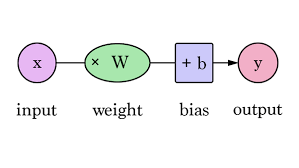


- `Weights`:These are like the "importance" of each input feature. If a feature has a high weight, it has a big impact on the model’s prediction. The model adjusts these weights during training to get better at making predictions.

- `Bias`:This is like an extra boost that helps the model make more accurate predictions. It shifts the decision boundary up or down, or left or right, giving the model more flexibility to fit the data.

### Example `#01`: Create a Linear Classifier in `PyTorch`.
Let's create a simple linear classifier using `PyTorch`.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a simple linear classifier.
class LinearClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

# Initialize the model, loss function, and optimizer.
input_size =  3 * 32 * 32  # CIFAR-10 images are 32x32 pixels with 3 color channels.
num_classes = 10           # Example for 10 classes (CIFAR-10 dataset).
model = LinearClassifier(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print(model)

Don't worry if this code confouses you, We are going to break the code in steps, to undestand it better.

##### **Break the code 🪨.**

1. **Model Definition.**
    ```python
    class LinearClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super(LinearClassifier, self).__init__()
            self.linear = nn.Linear(input_size, num_classes)

        def forward(self, x):
            out = self.linear(x)
            return out
    ```

    - This defines a simple neural network with just one layer. The `linear` layer maps the input directly to the output classes. The `forward` method processes input data through this layer to produce predictions.

2. **Setup for Training.**
    ```python
    input_size =  3 * 32 * 32  # CIFAR-10 images are 32x32 pixels with 3 color channels
    num_classes = 10           # 10 classes for CIFAR-10 dataset
    model = LinearClassifier(input_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    ```
    
    - `input_size` is set to match the number of pixels in a `CIFAR-10` image (3 color channels × 32 pixels × 32 pixels).
    - `num_classes` is the number of classes in the `CIFAR-10` dataset.
    - `model` creates an instance of the `LinearClassifier`.
    - `criterion` is the loss function for classification.
    - `optimizer` will adjust the model's weights during training using gradient descent.

3. **Displaying the Model.**
    ```python
    print(model)
    ```
    - This prints out the structure of the `LinearClassifier` model, showing you its layers and configurations.


### Prons & Cons.

- `Pros`:
    - Simple to implement and understand.
    - Fast to train and predict.

- `Cons`:
    - Limited capacity to capture complex patterns.
    - Performs poorly on non-linearly separable data.

### Optimization.

Optimization in linear classifiers involves **finding the best set of weights and biases that minimize** the loss function. Common optimization algorithms include Gradient Descent and its variants.

## [2. Feed Forward Neural Networks (FNN).]()

### What is actually a FNN (architecture)?


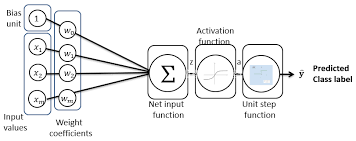


A `Feed Forward Neural Network` is a type of neural network where the connections between the nodes do not form a cycle. It consists of an input layer, one or more hidden layers, and an output layer. Each layer consists of neurons that process the input data and pass it to the next layer.

##### **How a FNN works and what are the differences with Linear Classifiers?**

A `FNN` processes the input data through multiple layers, with each layer applying a non-linear activation function to introduce complexity. Unlike linear classifiers, FNNs can model non-linear relationships in the data.

### Example `#02`: Create a Feed Forward Neural Network in `PyTorch`.

In [ ]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model, loss function, and optimizer.
hidden_size = 500
model = FeedForwardNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print(model)

##### **Break the code 🪨.**

1. **Defining the Model.**
    ```python
    class FeedForwardNN(nn.Module):
        def __init__(self, input_size, hidden_size, num_classes):
            super(FeedForwardNN, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(hidden_size, num_classes)
    ```

    - This sets up a simple neural network with one hidden layer. The `fc1` layer connects the input to the hidden layer, `relu` adds non-linearity, and `fc2` connects the hidden layer to the output.

2. **Forward Pass.**
    ```python
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    ```

    - This method tells the network how to process input data: through the hidden layer, then the activation function, and finally to the output layer.

3. **Setup for Training.**
    ```python
    hidden_size = 500
    model = FeedForwardNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    print(model)
    ```

    - Here, you create the model, choose a loss function for classification, and set up an optimizer to update the model's weights during training. `print(model)` shows the network's structure.

### Prons & Cons.
- `Pros`:
    - Capable of modeling complex non-linear relationships.
    - Flexible architecture that can be adapted to various tasks.

- `Cons`:
    - More computationally intensive.
    - Requires more data to train effectively.

### Optimization.

Optimization in FNNs involves adjusting the weights and biases using algorithms like Gradient Descent, often enhanced by techniques like momentum, learning rate schedules, and adaptive optimizers (e.g., Adam).

## [3. Deep Neural Networks (DNNs).]()


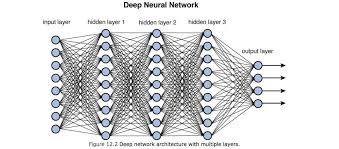


### The architecture of Deep Neural Networks.
A `Deep Neural Network` is an extension of `FNNs` with many hidden layers, enabling them to learn complex patterns in the data. `DNNs` consist of an input layer, multiple hidden layers, and an output layer.

#### **DNN Terminology and basic Notation**
**Explanation of each Layer:**

- `Input Layer`: Takes the input features.
- `Hidden Layers`: Intermediate layers that apply transformations to the input data.
- `Output Layer`: Produces the final predictions.

##### **Explanation of the terms Depth and Width of a network.**
- `Depth`: Number of hidden layers in the network.
- `Width`: Number of neurons in each hidden layer.

##### **How and why the number of hidden Layers.**
The number of `hidden layers` and their size (width) depend on the complexity of the problem. More layers and neurons can capture more complex patterns but also require more data and computational resources.

### How a DNN really works?
A DNN processes input data through multiple layers of transformations, learning hierarchical representations of the data. Each layer extracts increasingly complex features.

### Is a DNN better and why?
DNNs are often better for complex problems because they can model intricate patterns and dependencies in the data. However, they require more data and computational power to train.

### Example `#03`: Create a simple Deep Neural Network in `PyTorch`.

In [ ]:
class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


# Initialize the model, loss function, and optimizer.
model = DeepNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)


##### **Break the code 🪨.**
1. **Defining the Model.**
```python
class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)
```
- This sets up a deeper neural network with two hidden layers. `fc1` and `fc2` are fully connected layers, and `relu1` and `relu2` add non-linearity after each hidden layer. `fc3` connects to the output layer.

2. **Forward Pass.**
    ```python

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

    ```

    -  This method processes the input through all the layers: first through `fc1`, then `relu1`, then `fc2`, followed by `relu2`, and finally `fc3` to get the output.
    - The line `x = x.view(x.size(0), -1)` reshapes the input tensor from `[batch_size, 3, 32, 32]` to `[batch_size, 3072]`. This flattened tensor is then passed to the first fully connected layer (`fc1`).

### Prons & Cons.
- `Pros`:
    - Can model very complex patterns.
    - State-of-the-art performance on many tasks.

- `Cons`:
    - Requires large amounts of data.
    - Computationally expensive.

### Optimization.
Optimization in DNNs is crucial and involves techniques like advanced optimizers (`Adam`, `RMSprop`,`SGD`), regularization methods (`dropout`, `L2 regularization`), and careful hyperparameter tuning.


> #### ⭐ **Note:**
>
> ##### **Are Feedforward Neural Networks (FNNs) Deep Neural Networks (DNNs)?**
> Feedforward neural networks (FNNs) can be considered deep neural networks (DNNs) under certain conditions. The distinction between FNNs and DNNs primarily lies in the number of layers they possess:
>
> 1. **`Feedforward Neural Networks (FNNs)`**: These are a type of artificial neural network where connections between the nodes **do not form a cycle**. They consist of an input layer, one or more hidden layers, and an output layer. Information moves in one direction—from input to output.
>
> 2. **`Deep Neural Networks (DNNs)`**: These are a subset of neural networks with multiple layers between the input and output. "Deep" refers to the use of multiple hidden layers.
>
> Therefore, an FNN with a sufficient number of hidden layers can be classified as a DNN. In summary, **all DNNs with feedforward architectures are FNNs, but not all FNNs are DNNs unless they have multiple hidden layers**.
>
> ##### **Why Are FNNs Quite Similar to DNNs?**
> Feedforward neural networks (FNNs) and deep neural networks (DNNs) are similar because they share the same basic structure and operating principles:
>
> - **`Architecture`**: Both FNNs and DNNs are composed of layers of neurons. The primary difference is the number of hidden layers. While FNNs can have one or more hidden layers, DNNs specifically have multiple hidden layers.
> - **`Information Flow`**: In both types of networks, information flows in one direction—from the input layer through the hidden layers (if any) to the output layer.
> - **`Training`**: Both types of networks are typically trained using backpropagation and gradient descent techniques.
>
> ##### **Are FNNs Just DNNs, and Can We Do It Otherwise?**
>
> - **`FNNs as DNNs`**: FNNs can be considered a type of DNN when they have multiple hidden layers. In essence, DNNs are a more specific category under the broader umbrella of FNNs, characterized by their depth (i.e., number of layers).
>
> - **`Alternative Structures`**: Neural networks can be structured in various other ways beyond the feedforward architecture. Some examples include:
>  - `Recurrent Neural Networks (RNNs)`: Where connections between nodes form directed cycles, allowing them to maintain a memory of previous inputs.
>  - `Convolutional Neural Networks (CNNs)`: Primarily used for processing grid-like data such as images, where convolutional layers help in detecting patterns and features.
>  - `Generative Adversarial Networks (GANs)`: Comprising two networks (a generator and a discriminator) that compete with each other to generate realistic data.
>
> In conclusion, while FNNs and DNNs are closely related, the main distinction lies in the depth of the network. Neural networks can indeed be structured in various ways to suit different types of data and tasks.



> 🔗 Read More about How to Create Neural Networks in `PyTorch` [here]().


## [4. What is Optimization.]()

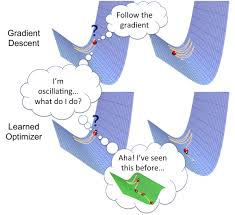



### Definition.
Optimization is the process of adjusting the parameters of a neural network to minimize the loss function and improve model performance.

### What - Why - How - When?

1. `What`: Adjusting weights and biases to reduce error.
2. `Why`: To improve the model's predictive accuracy.
3. `How`: Using algorithms like Gradient Descent and its variants.
4. `When`: During the training process.

### Explanation of optimization `step-by-step`.
- `Initialization`: Start with random weights.
- `Forward Pass`: Compute predictions and loss.
- `Backward Pass`: Calculate gradients of the loss w.r.t. parameters.
- `Update`: Adjust parameters using the gradients.




### Why Optimization is so important?
Optimization is essential because it directly impacts the model's performance. Proper optimization ensures that the model converges to a solution that generalizes well to unseen data.


## [5. Sum Up and Overall of all the Neural Networks.]()

Neural networks are powerful tools for modeling complex patterns in data. Linear classifiers are simple but limited, while FNNs and DNNs offer greater flexibility and performance at the cost of increased complexity and computational requirements. Optimization plays a crucial role in training these models effectively.

## [6. Training a Neural Network.]()


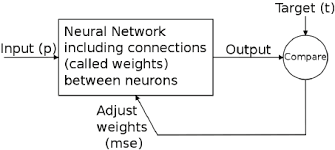


### The Data.
Data is the cornerstone of training a neural network. In the context of computer vision, this data typically consists of images, which are rich in information and complexity. The quality, quantity, and diversity of the data significantly influence the performance of the model. Properly handling and preparing the data is crucial for achieving optimal results.

### Splitting the Data into Subsets.

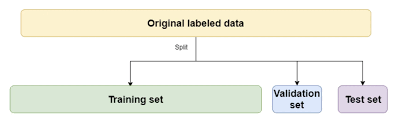


Data is typically split into training, validation, and test sets.

- `Training Set`: Used to train the model.
- `Validation Set`: Used to tune hyperparameters and make decisions about the model architecture. It helps in evaluating the model during training.
- `Test Set`: Used to evaluate the final model's performance.

### Why Splitting is Important?

Splitting ensures that the model is evaluated on unseen data, which helps in assessing its generalization capability. Without proper splitting, the model might perform well on the training data but fail to generalize to new, unseen data, leading to overfitting. This approach ensures a robust evaluation of the model's true performance.

### Preprocessing.

#### **Why is Preprocessing so Important?**

Preprocessing is crucial for several reasons:

- `Normalizing Data`: Ensures that different features contribute equally to the model, preventing any single feature from dominating the learning process.
- `Removing Noise`: Eliminates irrelevant or redundant information that could mislead the model during training.
- `Transforming Features`: Converts raw data into a suitable format or scale for the model, improving its performance and convergence speed.

Effective preprocessing helps in enhancing the accuracy and efficiency of the neural network.

### Common `PyTorch` example code and explanation (Splitting and Preprocessing).



In [ ]:
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Data transforms for training and validation.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset.
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets (80% train, 20% val).
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])


Let's go through the code step-by-step to understand what each part does:

```python
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets
```
The imports:
- `DataLoader from torch.utils.data`: Used to load data in batches for training and testing.
- `random_split from torch.utils.data`: Used to split a dataset into non-overlapping new datasets.
- `transforms from torchvision.transforms`: Used to perform data preprocessing and augmentation.
- `datasets from torchvision.datasets`: Provides access to common datasets like `CIFAR-10`.

```python
# Data transforms for training and validation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
```
The transformations:
- `transforms.Compose`: Combines multiple transformation steps.
- `transforms.ToTensor()`: Converts a `PIL` image or `NumPy` array to a tensor.
- `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`: - Normalizes the tensor. The `CIFAR-10` images are normalized to have a mean of 0.5 and a standard deviation of 0.5 for each of the three color channels (RGB).

```python
# Split the training dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
```
Splitting the Dataset:

- Train-Validation Split:    
    - `train_size = int(0.8 * len(train_dataset))`: Calculates the size of the training set as 80% of the total training dataset.
    - `val_size = len(train_dataset) - train_size`: Calculates the size of the validation set as the remaining 20%.
    - `random_split(train_dataset, [train_size, val_size])`: Randomly splits the training dataset into training and validation sets based on the calculated sizes.

##### **Validation Set: Purpose and Benefits.**

A validation set is a portion of the training dataset that is not used to train the model. Instead, it's used to evaluate the model's performance during training.

**Purpose**:
1. **`Monitoring Performance`**:
   - **`Track Progress`**: It helps to keep track of how well the model is doing on data it hasn't seen during training.
   - **`Overfitting Check`**: It ensures the model isn't just memorizing the training data but is learning to generalize to new data.

2. **`Hyperparameter Tuning`**:
   - **`Optimize Settings`**: Used to find the best settings (like learning rate or batch size) that improve the model's performance.

3. **`Early Stopping`**:
   - **`Stop Early`**: If the model's performance on the validation set stops improving, we can stop training early to save time and avoid overfitting.

**Benefits**:
1. **`Generalization Check`**:
   - Helps determine how well the model performs on new, unseen data.

2. **`Overfitting Detection`**:
   - By observing when the validation loss starts increasing while the training loss keeps decreasing, we can detect overfitting.

3. **`Improved Model Performance`**:
   - Assists in balancing the model's complexity, leading to better overall performance on new data.

##### **Why We Use a Validation Set ?**

- The validation set **gives us a good indication of how the model will perform on real-world data**. It helps ensure that the model doesn't just memorize the training data but learns patterns that generalize to new data.
- After using the validation set to tune and evaluate the model, we use a separate test set for the final evaluation. This test set is completely unseen during both training and validation phases, providing an unbiased assessment of the model's performance.

### The Training procedure.
##### **Explanation `step-by-step` of the whole process.**
- `Forward pass`: Compute the predictions.
    1. `Initialization`:
        - The model is initialized with random weights.
        - The input data is fed into the model.
    2. `Prediction (Forward Pass)`:
        - The input data passes through the model layer by layer.
       - Each layer applies its weights and biases to the input and passes the result through an activation function.
The final layer produces the output predictions.
- `Backward pass (Backpropagation)`: Calculate gradients and adjust weights.
    3. `Loss Calculation`:
        - The predictions from the forward pass are compared to the actual targets using a loss function (e.g., Mean Squared Error for regression, Cross-Entropy Loss for classification).
        - This loss quantifies the difference between the predicted values and the actual values.

    4. `Gradient Calculation`:
        - The gradients (partial derivatives of the loss with respect to each weight) are computed using backpropagation.
        - These gradients indicate the direction and magnitude of change needed in each weight to reduce the loss.

    5. `Weights Update`:
        - The model's weights are adjusted in the opposite direction of the gradients to minimize the loss.
        - This is done using an optimization algorithm like Stochastic Gradient Descent (SGD) or Adam.

    6. `Iteration`:
        - Steps `2` to `5` are repeated for a specified number of epochs or until the model converges (i.e., when the loss stops decreasing significantly).

### Common problems: Overfitting - Underfitting and explanation in depth.

<img src="https://miro.medium.com/v2/resize:fit:1396/1*lARssDbZVTvk4S-Dk1g-eA.png" alt="Example Image" width="500">



##### **Overfitting.**
`Overfitting` occurs when **a model performs well on the training data but poorly on the test data**. This means the model has learned the training data's noise and specific patterns rather than generalizing from the data.

- **`Mitigation`**:
    - `Regularization`: Techniques like `L1` and `L2` regularization add a penalty for larger weights, encouraging the model to use smaller weights and thus reducing complexity.    
    - `Dropout`: Randomly drops neurons during training to prevent the model from becoming too reliant on specific neurons, promoting generalization.
    - `More Data`: Increasing the amount of training data helps the model learn more general patterns rather than overfitting to a small dataset.
    
##### **Underfitting.**
`Underfitting` occurs when **a model performs poorly on both the training and test data**. This indicates that the model is too simple to capture the underlying patterns in the data.

- **`Mitigation`**:
    - `More Complex Model`: Increasing the model's complexity by adding more layers or neurons can help it learn more complex patterns.
    - `More Features`: Adding relevant features can provide the model with more information, enabling it to capture more complex patterns.

### **`PyTorch` example code of the procedure:**

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        # Training loop
        model.train()                                           # Set the model to training mode.
        running_loss = 0.0
        for inputs, targets in train_loader:
            # Forward pass
            predictions = model(inputs)                        # Compute the model predictions.
            loss = criterion(predictions, targets)             # Calculate the loss.

            # Backward pass and optimization
            optimizer.zero_grad()                              # Clear old gradients.
            loss.backward()                                    # Compute new gradients.
            optimizer.step()                                   # Update model parameters.
            running_loss += loss.item()                        # 7. Accumulate training loss.

        # Validation loop
        model.eval()                                            # Set the model to evaluation mode.
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():                                   # Disable gradient computation.
            for inputs, targets in val_loader:
                predictions = model(inputs)                    # Compute the model predictions.
                loss = criterion(predictions, targets)         # Calculate the validation loss.
                val_loss += loss.item()                        # Accumulate validation loss.
                _, predicted = torch.max(predictions.data, 1)  # Get the predicted class.
                total += targets.size(0)                       # Total number of samples.
                correct += (predicted == targets).sum().item() # Number of correct predictions.

        train_loss = running_loss / len(train_loader)          # Calculate average training loss.
        val_loss /= len(val_loader)                            # Calculate average validation loss.
        val_accuracy = 100 * correct / total                   # Calculate validation accuracy.

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%') # 19. Print epoch results


##### **Break the code 🪨.**
The `train_model` function trains a neural network model over a specified number of epochs using a given training dataset and evaluates its performance on a validation dataset at each epoch. During training, it updates the model's parameters to minimize the loss function. After each epoch, it switches to evaluation mode to calculate the validation loss and accuracy without updating the parameters. This process helps in monitoring the model's performance and ensuring it generalizes well to new, unseen data.

##### 🔑 **Key Things to remeber in the Training Procedure:**

1. **`Model Modes`**:
   - **`Training Mode`**: Use `model.train()` to enable behaviors specific to training, such as dropout.
   - **`Evaluation Mode`**: Use `model.eval()` to disable training-specific behaviors during validation and testing.

2. **`Forward Pass`**:
   - Compute the model's predictions based on the input data.
   - Use these predictions to calculate the loss.

3. **`Backward Pass`**:
   - **`Gradient Calculation`**: Use `loss.backward()` to compute gradients for each parameter.
   - **`Parameter Update`**: Use `optimizer.step()` to adjust the model parameters based on the gradients.

4. **`Loss Accumulation`**:
   - Track the training and validation losses across the dataset to compute average losses per epoch.

5. **`Gradient Management`**:
   - **`Zero Gradients`**: Always use `optimizer.zero_grad()` before starting the backward pass to prevent gradients from accumulating.

6. **`Validation`**:
   - **`No Gradient Computation`**: Use `torch.no_grad()` during validation to save memory and computations.
   - **`Accuracy Calculation`**: Evaluate the model's performance on the validation set to monitor generalization.

7. **`Early Stopping & Hyperparameter Tuning`**:
   - Monitor validation loss and accuracy to adjust training strategies and hyperparameters, and possibly implement early stopping to prevent overfitting.

### The Methodology 🖊📑 :
1. **`Initialization`**:
   - Define the model architecture.
   - Set up the loss function and optimizer.
   - Prepare the training, validation, and test datasets.

2. **`Training Loop`**:
   - **`For Each Epoch`**:
     - **Set Training Mode**: Enable training-specific features.
     - **`Forward Pass`**: Compute predictions and loss for each batch.
     - **`Backward Pass`**: Compute gradients and update model parameters.
     - **`Track Loss`**: Accumulate and average the loss for the epoch.

3. **`Validation Loop`**:
   - **`Set Evaluation Mode`**: Disable training-specific features.
   - **`No Gradient Calculation`**: Compute predictions and loss for the validation set.
   - **`Calculate Metrics`**: Compute and track validation loss and accuracy.

4. **`Epoch Results`**:
   - Print or log training and validation metrics to monitor model performance.

5. **`Testing (Post-Training)`**:
   - Evaluate the model on the test dataset to get an unbiased performance assessment.


By following these steps, you'll make sure that your model is not only trained well but also tested and validated thoroughly. This approach helps in creating a strong model that performs well on new, unseen data.

Now, let's use this function to train our model:



In [ ]:
# Create the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)        # We don't really need this now, but we will use it in the next chapter

# Model, loss function, and optimizer
input_size = 3 * 32 * 32        # CIFAR-10 images are 32x32 pixels with 3 color channels.
hidden_size = 512               # Example hidden layer size.
num_classes = 10                # CIFAR-10 has 10 classes.

model = DeepNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=1)

Let me explain in more depth ...
```python
# Create the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
```
The `DataLoader` objects manage how data is fed into the model. `train_loader` handles the training data, shuffling it to improve training, while `val_loader` and `test_loader` handle validation and test data respectively, without shuffling to ensure consistent evaluation. This setup helps streamline data processing during training and evaluation phases.

```python
# Model, loss function, and optimizer
input_size = 3 * 32 * 32        # CIFAR-10 images are 32x32 pixels with 3 color channels.
hidden_size = 512               # Example hidden layer size.
num_classes = 10                # CIFAR-10 has 10 classes.

model = DeepNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
```
This section sets up the model, loss function, and optimizer. The `DeepNN` model is initialized with an input size matching `CIFAR-10` images (3072 features), a specified hidden layer size (512 neurons), and 10 output classes. `CrossEntropyLoss` is used to calculate the classification error, while the `Adam` optimizer adjusts the model parameters with a learning rate of 0.001, balancing learning speed and stability.

```python
# Training
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

```
The `train_model` function initiates the training process. It trains the `DeepNN` model using data from `train_loader` and evaluates performance on `val_loader` over 10 epochs. During each epoch, the model is updated based on training data and periodically validated to monitor its performance and avoid overfitting, ensuring robust learning and generalization.
  

> ##### ⚡ **More things about Training.**
>
>Training a neural network involves a lot of ***trial and error***. It's important to monitor the performance and make adjustments as needed.

##[7. Evalution and Testing.]()

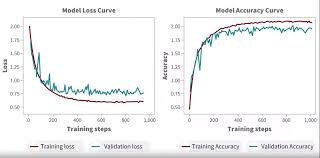


Evaluation is a critical phase in the machine learning pipeline where **you assess how well your model performs on data it has never seen before**. This step ensures that the model is not just memorizing the training data but can generalize its learning to new, unseen examples. Here’s a straightforward breakdown:

##### **Purpose of Evaluation:**
- `Generalization Check`: You want to ensure that your model, which has learned from training data, can make accurate predictions on new test data.
- `Performance Metrics`: Evaluation helps you measure how well your model is doing, allowing you to compare different models or tweak your current one.

##### **Understanding Loss and Metrics**
Loss and metrics are both important concepts in machine learning and deep learning, used to evaluate and understand model performance. Here’s a detailed explanation of each, including their roles in evaluation and testing.

1. Loss:
    - ` What It Is`: Loss is a measure of how well the model’s predictions align with the true values. It quantifies the error or difference between predicted and actual values.
    - `Purpose`: The primary role of the loss function is to guide the optimization process during training. By minimizing the loss, we adjust the model's parameters to improve its performance.
    - `When to Use`: During training, the model’s parameters are updated to reduce the loss using optimization algorithms like gradient descent. A lower loss indicates better performance on the training data.
    - `Common Loss Functions`:
        - `Mean Squared Error (MSE)`: Used for regression tasks. It calculates the average squared difference between predicted and actual values.
        - `Cross-Entropy Loss`: Used for classification tasks. It measures the difference between the predicted probability distribution and the actual one-hot encoded labels.

2. Metrics:
    - `What It Is`: Metrics are used to evaluate the model’s performance in various aspects. They provide a comprehensive view of how well the model performs, often on unseen validation or test data.
    - `Purpose`: Metrics help to understand the quality of the model’s predictions, providing insights into different aspects of performance such as accuracy, precision, recall, and more.
    - A simple definition of some `Common Metrics`:
        - `Accuracy`: Measures the proportion of correctly predicted samples out of all samples.
        - `Precision`: The proportion of true positive predictions among all positive predictions.
        - `Recall`: The proportion of true positive predictions among all actual positives.
        - `F1-Score`: The harmonic mean of precision and recall, providing a balance between the two metrics.
        - `Confusion Matrix`: A table that shows how well the model predicted each class.
    - `Usage`: Metrics are used during evaluation to assess how well the model performs on new data and are crucial for comparing different models or configurations.

##### 🔑 **Accuracy as a Key Metric for Supervised Learning.**
Accuracy is the ratio of correctly predicted samples to the total number of samples. It is a straightforward metric that indicates the overall performance of a model.

- **Formula:**
\begin{align}
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
\end{align}

- **Purpose:**
    
    Accuracy provides a quick measure of how often the model is correct. It’s particularly useful when the dataset is balanced, meaning each class is equally represented.

- **When to Use Accuracy:**
    1. `Balanced Datasets`: Accuracy is very effective when the classes are roughly equally represented. For instance, in a dataset where each class has an equal number of samples, accuracy gives a clear picture of performance.
    2. `Simple Tasks`: For tasks where it is crucial to know the overall correctness of the model, such as basic image classification, accuracy is a good metric.

- **Limitations:**
    - `Imbalanced Datasets`: In cases where some classes are much more frequent than others, accuracy can be misleading. A model that predicts only the majority class might still achieve high accuracy but perform poorly on minority classes.
    - `Does Not Reflect Class-specific Performance`: Accuracy does not provide insights into how well the model performs for each individual class. For imbalanced datasets or tasks with varying importance across classes, precision, recall, and F1-score might offer more detailed insights.


##### ***Let's illustate a simple example using the `CIFAR-10` dataset...***

Imagine you’ve trained a neural network to classify `CIFAR-10` images, which contain 10 types of objects like cats, dogs, and airplanes. After training, you test the model on 1,000 images it hasn't seen before.

**`Loss Example`:**

If the model makes a lot of mistakes, the loss value will be high, meaning the model’s guesses are pretty far from the correct answers. Think of loss like a measure of how badly the model is performing.

**`Accuracy Example`:**

Now, if the model correctly identifies 800 out of those 1,000 images, that’s an accuracy of 80%. So, it’s right 80% of the time. Accuracy tells you how often the model gets it right with new, unseen images.

In short, loss shows you how much your model is struggling, while accuracy tells you how often it’s getting things right.

##### 7. **The Evaluation process:**
1. `Prepare the Test Data`:
    - Use a DataLoader to handle your test data in batches.
2. `Make Predictions`:
    - Run your test data through the trained model to get predictions.
3. `Compute Metrics`:
    - Compare the model’s predictions to the actual labels using metrics like accuracy, precision, recall, and F1-score. We will use the accuracy as our metric for this tutorial.
4. `Review Results`:
    - Look at the metrics to understand the model’s performance and identify any areas for improvement.
5. `Visualize the Confusion Matrix` <sub>(optional)</sub> :
    - See which predictions were correct and which were incorrect for each class.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

def evalate_model(model, test_loader):
    # Set the model to evaluation mode.
    model.eval()

    # Lists to hold true labels and predictions.
    all_labels = []                                                # Stores the true labels from the test set.
    all_predictions = []                                            # Stores model's predictions for the test set.

    # Disable gradient calculations for evaluation.
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)                                 # Get model predictions
            _, predicted = torch.max(outputs, 1)                    # Get the index of the max log-probability.
            all_labels.extend(labels.cpu().numpy())                 # Collect true labels.
            all_predictions.extend(predicted.cpu().numpy())         # Collect model predictions.

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    conf_matrix = confusion_matrix(all_labels, all_predictions)

    return accuracy, conf_matrix

# Evaluate the model
accuracy, conf_matrix = evalate_model(model, test_loader)

# Print out the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

##### **Break the code 🪨.**

Evaluating a model's performance is essential to determine how effectively it makes predictions on new, unseen data. This procedure details how to evaluate a `PyTorch` model using a test dataset to compute key metrics, such as accuracy and the confusion matrix.

Here's how the evaluation is performed `step-by-step`:
```python
from sklearn.metrics import accuracy_score, confusion_matrix
```
This imports two evaluation metrics from the Scikit-Learn library:
- `accuracy_score`: Used to compute the accuracy of predictions.
- `confusion_matrix`: Used to compute the confusion matrix to evaluate the performance of classification.

```python
evalate_model(model, test_loader)
```
This function takes two arguments:
- `model`: The trained neural network model that we want to evaluate.
- `test_loader`: A `PyTorch DataLoader` object that provides batches of test data and labels.

```python
    model.eval()
```
Sets the model to evaluation mode. This is important because it tells the model that it is being evaluated, not trained. In evaluation mode, layers like dropout and batch normalization behave differently (i.e., dropout is disabled and batch normalization uses running statistics).

```python
with torch.no_grad():
```
This context manager disables gradient calculations. It is used during evaluation because we do not need to compute gradients, which saves memory and computational resources.

```python
        for inputs, labels in test_loader:
```
Iterates over batches of data from the `test_loader`. Each batch consists of inputs (the test images) and labels (the true labels for these images).

```python
            outputs = model(inputs)                                 # Get model predictions
            _, predicted = torch.max(outputs, 1)                    # Get the index of the max log-probability.
            all_labels.extend(labels.cpu().numpy())                 # Collect true labels.
            all_predictions.extend(predicted.cpu().numpy())         # Collect model predictions.

```
For each batch, the model generates predictions using `outputs = model(inputs)`, which produces the model's output probabilities for each class. To determine the most likely class for each input, `torch.max(outputs, 1)` is used to find the index of the highest probability, which represents the predicted class labels. Both these predictions and the true labels from the batch are converted to `NumPy` arrays to ensure compatibility with evaluation metrics. The true labels and predicted labels are then collected and stored in the lists `all_labels` and `all_predictions`, respectively. This allows for the calculation of performance metrics such as accuracy and the confusion matrix.

```python
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    conf_matrix = confusion_matrix(all_labels, all_predictions)

    return accuracy, conf_matrix
```
After gathering all the true and predicted labels, the code calculates performance metrics to evaluate the model's accuracy. The `accuracy_score(all_labels, all_predictions)` function computes the proportion of correctly classified samples compared to the total number of samples, giving a measure of overall accuracy. The `confusion_matrix(all_labels, all_predictions)` function generates a matrix that shows the count of true positive, true negative, false positive, and false negative predictions for each class, which helps to visualize the model's performance in more detail. The calculated accuracy and confusion matrix are then returned for further analysis.

##### 📦 **In Summary.**
Evaluation is all about checking how well your model performs on data it hasn't seen before. By using metrics like accuracy, precision, recall, and F1-score, and reviewing the confusion matrix, you can get a clear picture of how well your model is doing and make any necessary adjustments to improve its performance.

## [8. How to actually understand the evaluation?]()


<img src="https://www.researchgate.net/publication/345756493/figure/fig4/AS:956919023947779@1605158682520/Learning-curves-in-Neural-Network.ppm" alt="Example Image" width="500">


To truly understand the results of our model evaluation, we need to delve into the details of various evaluation metrics. This involves not just looking at numbers but interpreting what they mean in the context of our specific problem. By examining these metrics, we can gain insights into how well our model is likely to perform on unseen data, identify areas where it excels, and uncover weaknesses that need improvement.


<img src="https://media.licdn.com/dms/image/C5112AQGM7rWklfggow/article-cover_image-shrink_600_2000/0/1578311015279?e=2147483647&v=beta&t=NLQtAPXns5-JkorK_hZYSv4cIW1iIp2OG866h3SdN24" alt="Example Image" width="500">


Let's dive deeper into each metric to understand what it does and why we use it, so we can make informed decisions about which metrics to focus on and when.

Here’s a detailed explanation of some important evaluation metrics and their purposes:

1. `Accuracy`:
    - This metric has already explained with great detail in the previous chapter, so just go back to it and check it ;)

    ```python
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    ```
2. `Precision:`
    - Precision tells us how many of the instances predicted as positive are actually positive. This is especially important in scenarios where false positives are costly.

    ```python
    from sklearn.metrics import precision_score
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f'Precision: {precision:.2f}')
    ```

3. `Recall (Sensitivity)`:
    - Recall measures how many of the actual positive instances our model correctly identifies. This is crucial when missing a positive instance has a high cost.

    ```python
    from sklearn.metrics import recall_score
    recall = recall_score(y_true, y_pred, average='weighted')
    print(f'Recall: {recall:.2f}')
    ```


4. `F1 Score`:
    -  The F1 Score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.

    ```python
    from sklearn.metrics import f1_score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f'F1 Score: {f1:.2f}')
    ```

5. `Confusion Matrix`:
    - A confusion matrix gives a detailed breakdown of correct and incorrect predictions by class. It helps us understand specific types of errors our model is making.

    ```python
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)
    ```

##### **Interpreting the Metrics.**
- `Accuracy` provides a broad overview but can be misleading with imbalanced classes.
- `Precision` indicates the quality of positive predictions, which is important for minimizing false positives.
- `Recall` shows how well the model identifies all positive instances, minimizing false negatives.
- `F1 Score` balances precision and recall, offering a single metric for overall performance.
- `Confusion Matrix` provides a detailed view of model errors, helping us see which classes are misclassified.

##### **Real-World Example 🌟🔍🩺🏥** .

Imagine you have a medical diagnosis model that predicts whether a patient has a disease (positive) or not (negative). Here's how to understand the metrics:

- **`Accuracy`**🎯: If the accuracy is high but the disease is rare, the model might be predicting most cases as negative, which isn't very useful. It's like saying everyone is healthy because most people are, but missing the few who are actually sick.
- **`Precision`**✅: High precision means that when the model says a patient has the disease, it’s usually correct. This reduces false alarms and unnecessary stress for patients.
- **`Recall`**📈: High recall ensures that the model catches most of the patients who have the disease. This is crucial in medical settings because missing a diagnosis can be very serious.
- **`F1 Score`**📊: A good F1 score indicates a balance between precision and recall, giving you a well-rounded model. This is important because you want both to identify the disease and to avoid too many false positives.
- **`Confusion Matrix`**: By analyzing the confusion matrix, you can see if the model frequently misses disease cases (false negatives) or wrongly diagnoses healthy patients (false positives). This helps you understand where the model is making errors.

##### **How to Know if the Model is Good.**

To determine if your model is good, follow these steps:

1. `Evaluate Metrics`: Check the accuracy, precision, recall, F1 score, and confusion matrix. High values of precision and recall indicate good performance.
2. `Balance Metrics`: Ensure that precision and recall are balanced with a good F1 score. High precision but low recall, or vice versa, indicates an issue.
3. `Confusion Matrix`: Analyze this matrix to understand specific errors. Ensure that misclassifications are minimal and acceptable for your use case.
4. `Cross-Validation`: Use cross-validation to ensure the model’s performance is consistent across different subsets of the data.
5. `Test on Unseen Data`: Evaluate the model on a separate test set to ensure it generalizes well to new data.

## [9. Overall Sum Up and Further Explanation.]()

In this tutorial, we've journeyed through the essentials of neural networks, explored different types, and learned how to bring them to life using `PyTorch`. 🚀 From understanding linear classifiers to diving into deep neural networks, we've covered a lot of ground!

Here’s a quick recap:
- **`Neural Networks Basics`:** We’ve demystified what neural networks are and how they function. 🧠
- **`Types of Networks`:** We looked at linear classifiers, feedforward neural networks, and deep neural networks, understanding their structures and differences. 📊
- **`Implementation`:** We created these networks step-by-step in `PyTorch`, giving you hands-on experience. 🛠️
- **`Optimization`:** We highlighted why optimizing your models is crucial for getting the best performance. ⚙️

With these tools and knowledge, you’re now ready to build and train your own neural networks for various applications.

🎯 Remember, the key to mastering these concepts is practice and experimentation. Keep exploring, tweaking, and learning, and you’ll continue to grow your skills.

Your `PyTorch` coding jurney just only started! 😊👩‍💻👨‍💻